Train Error:  4.61140462392
Test Error:  4.59035027279


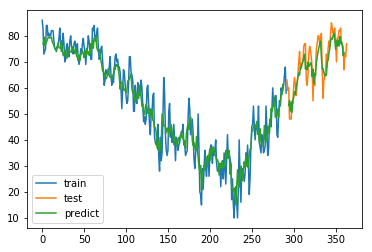

In [14]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

In [11]:
%matplotlib inline
from analysis import Analysis
from models import *
analysis = Analysis('weather')
analysis.load_data()

Now setting the features and predictor to just be the avg temperature value.

In [12]:
predictor = 'actual_mean_temp'
features = [predictor]
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

Number of train data points:  292
Number of test data points:  73


Set some parameters that are used by some of the models

In [13]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

LinearRegression

Train Error:  4.61140462392
Test Error:  4.59035027279


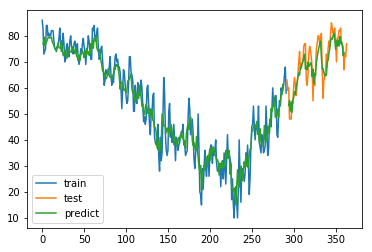

In [14]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

FeedForward Neural Network

In [8]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='linear',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='linear'))
nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model)


Using TensorFlow backend.


Train on 286 samples, validate on 67 samples
Epoch 1/10


 - 0s - loss: 51.5775 - val_loss: 70.7301


Epoch 2/10
 - 0s - loss: 50.9975 - val_loss: 70.1501


Epoch 3/10
 - 0s - loss: 50.4175 - val_loss: 69.5701


Epoch 4/10
 - 0s - loss: 49.8375 - val_loss: 68.9901


Epoch 5/10
 - 0s - loss: 49.2575 - val_loss: 68.4101


Epoch 6/10


 - 0s - loss: 48.6775 - val_loss: 67.8301


Epoch 7/10


 - 0s - loss: 48.0975 - val_loss: 67.2501


Epoch 8/10


 - 0s - loss: 47.5175 - val_loss: 66.6701


Epoch 9/10


 - 0s - loss: 46.9375 - val_loss: 66.0901


Epoch 10/10


 - 0s - loss: 46.3575 - val_loss: 65.5101


Train Error:  46.3333170497
Test Error:  64.2116125448


ValueError: all the input arrays must have same number of dimensions

Recurrent Neural Network

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

RNN = layers.SimpleRNN
mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(RNN(50, input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNN(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)